# New York City Taxi and Limousine Commission (TLC) Trip Record Data Analysis

# Background

The New York City Taxi and Limousine Commission (TLC) is the regulatory agency responsible for licensing and overseeing various types of for-hire vehicles in New York City. Established in 1971, the TLC is responsible for licensing and regulating Medallion (Yellow) taxi cabs, for-hire vehicles such as community-based liveries, black cars, luxury limousines, commuter vans, and paratransit vehicles.

The TLC's Board consists of nine members, with the Chair/Commissioner leading the agency. The agency employs approximately 600 staff members to carry out its regulatory functions. With over 200,000 TLC licensees, the commission oversees around 1,000,000 trips on a daily basis.

To operate as a for-hire driver, individuals must undergo background checks, have a safe driving record, and complete 24 hours of driver training. TLC-licensed vehicles undergo thorough safety and emissions inspections at the TLC's Woodside Inspection Facility. The commission licenses and regulates over 130,000 vehicles in New York City, ensuring they meet safety standards and are driven by TLC-licensed drivers who have met the necessary requirements.

In summary, the TLC plays a vital role in regulating and ensuring the safety of the taxi and for-hire vehicle industry in New York City, licensing a large number of vehicles and overseeing driver qualifications, vehicle inspections, and overall compliance with regulations.

# Problem Identification

The problem of insufficient taxi distribution in certain areas refers to the uneven availability of taxis across different locations in New York City. It means that some areas have a scarcity of taxis, leading to limited access to reliable transportation services for residents and visitors.

# Stakeholder

The stakeholder is the COO of NYC TLC Company

# Glosary

1. VendorID = A code indicating the LPEP provider that provided the record.
    - 1 = Creative Mobile Technologies, LLC. 
    - 2 = VeriFone Inc.

2. lpep_pickup_datetime = The date and time when the meter was engaged.

3. lpep_dropoff_datetime = The date and time when the meter was disengaged.

4. Passenger_count = The number of passengers in the vehicle. This is a driver-entered value.

5. Trip_distance = The elapsed trip distance in miles was reported by the taximeter.

6. PULocationID = TLC Taxi Zone in which the taximeter was engaged.

7. DOLocationID = TLC Taxi Zone in which the taximeter was disengaged.

8. RateCodeID = The final rate code is in effect at the end of the trip.
    - 1 = Standard rate
    - 2 = JFK
    - 3 = Newark
    - 4 =Nassau or Westchester 
    - 5 =Negotiated fare
    - 6 =Group ride

9. Store_and_fwd_flag = This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip

10. Payment_type = A numeric code signifying how the passenger paid for the trip.
    - 1 = Credit card 
    - 2 = Cash
    - 3 = No charge 
    - 4 = Dispute
    - 5 = Unknown 
    - 6 = Voided trip

11. Fare_amount = The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

12. MTA_tax = $0.50 MTA tax that is automatically triggered based on the metered rate in use.

13. Improvement_surcharge = $0.30 improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015.

14. Tip_amount = This field is automatically populated for credit card tips. Cash tips are not included.

15. Tolls_amount = The total amount of all tolls paid in the trip.

16. Total_amount = The total amount charged to passengers. Does not include cash tips.

17. Trip_type = A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.
    - 1 = Street-hail 
    - 2 = Dispatch

# Data

In [1278]:
import matplotlib
import seaborn
import scipy
import plotly
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, f_oneway, pearsonr, spearmanr, chi2_contingency, kruskal
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
from statsmodels.stats.proportion import proportions_ztest 
import warnings
warnings.filterwarnings('ignore')

In [1279]:
# Read CSV File of NYC TLC Trip Record Data

tlctrip = pd.read_csv('NYC TLC Trip Record.csv')
display(tlctrip)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [1280]:
# Read CSV File of Taxi Zone to be Combined with NYC TLC Trip Record Data

zone = pd.read_csv('taxi+_zone_lookup.csv')
zone.drop('service_zone', axis = 1, inplace = True)

In [1281]:
# Read Taxi Zone Data

display(zone)

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights
...,...,...,...
260,261,Manhattan,World Trade Center
261,262,Manhattan,Yorkville East
262,263,Manhattan,Yorkville West
263,264,Unknown,NV


In [1282]:
# Checking Data Type

tlctrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

# Data Cleaning : 

In [1283]:
# Check whether there is missing values

tlctrip.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [1284]:
# Convert dates into datetime format

tlctrip['lpep_pickup_datetime'] = pd.to_datetime(tlctrip['lpep_pickup_datetime'])
tlctrip['lpep_dropoff_datetime'] = pd.to_datetime(tlctrip['lpep_dropoff_datetime'])

In [1285]:
# Dropped column because there is no data present in this column

tlctrip.drop('ehail_fee', axis = 1, inplace = True)
print(tlctrip)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag   
0             2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N  \
1             2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
2             2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
3             1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
4             1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
...         ...                  ...                   ...                ...   
68206         2  2023-01-31 22:29:00   2023-01-31 22:42:00                NaN   
68207         2  2023-01-31 22:40:00   2023-01-31 22:48:00                NaN   
68208         2  2023-01-31 23:46:00   2023-02-01 00:02:00                NaN   
68209         2  2023-01-31 23:01:00   2023-01-31 23:19:00                NaN   
68210         2  2023-01-31 23:51:00   2023-02-01 00:07:00                NaN   

       RatecodeID  PULocati

In [1286]:
# Dropped column where there are 5 missing information in one row 

tlctrip.dropna(subset = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'congestion_surcharge'], inplace = True)

In [1287]:
# Dropped 10 NaN in trip_type column

tlctrip.dropna(subset=['trip_type'], inplace=True)

In [1288]:
# Re-check for any missing values

tlctrip.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [1289]:
# Check for zeros value in every columns

def check_for_zeros(tlctrip):
    for col in tlctrip.columns:
        zeros = tlctrip[tlctrip[col] == 0].shape[0]
        print(f"Zeros in {col} = {zeros}")

check_for_zeros(tlctrip)

Zeros in VendorID = 0
Zeros in lpep_pickup_datetime = 0
Zeros in lpep_dropoff_datetime = 0
Zeros in store_and_fwd_flag = 0
Zeros in RatecodeID = 0
Zeros in PULocationID = 0
Zeros in DOLocationID = 0
Zeros in passenger_count = 336
Zeros in trip_distance = 3197
Zeros in fare_amount = 83
Zeros in extra = 36419
Zeros in mta_tax = 1591
Zeros in tip_amount = 28317
Zeros in tolls_amount = 62484
Zeros in improvement_surcharge = 186
Zeros in total_amount = 69
Zeros in payment_type = 0
Zeros in trip_type = 0
Zeros in congestion_surcharge = 46986


In [1290]:
# Dropping zeros value that couldn't have 0 value

tlctrip = tlctrip[tlctrip['passenger_count'] > 0]
tlctrip = tlctrip[tlctrip['trip_distance'] > 0]
tlctrip = tlctrip[tlctrip['fare_amount'] > 0]

def check_for_zeros(tlctrip):
    zero_counts = tlctrip.eq(0).sum()
    return zero_counts

check_for_zeros(tlctrip)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                    33580
mta_tax                    941
tip_amount               25602
tolls_amount             59072
improvement_surcharge       64
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge     43604
dtype: int64

In [1291]:
# Dropping NaN value of Taxi Zone Data

zone = zone[zone['LocationID'] != 264]
zone = zone[zone['LocationID'] != 265]

In [1292]:
# Display the data

tlctrip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,1.0,0.5,0.00,0.0,1.0,22.95,2.0,1.0,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [1293]:
# Column in NYC TLC Trip Record Data

tlctrip.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

# Create New Variable 

## Extract Time into New Variable

In [1294]:
# Extract duration of trip

tlctrip['travel_time_min'] = tlctrip.lpep_dropoff_datetime - tlctrip.lpep_pickup_datetime

In [1295]:
# Convert travel time into minutes

tlctrip['travel_time_min'] = tlctrip.travel_time_min.dt.total_seconds()/60.0

In [1296]:
# Extract hour from date time

tlctrip['hourofday'] = tlctrip.lpep_pickup_datetime.dt.hour

In [1297]:
tlctrip['hour'] = tlctrip['lpep_pickup_datetime'].dt.strftime('%X')
tlctrip['hour'] = tlctrip['hour'].str.slice(0,2)

In [1298]:
# Groupby Time Range

def TimeRange(value):
    if value in ['00','01','02']:
        return '00:00 - 03:00'
    elif value in ['03','04','05']:
        return '03:00 - 06:00'
    elif value in ['06','07','08']:
        return '06:00 - 09:00'
    elif value in ['09','10','11']:
        return '09:00 - 12:00'
    elif value in ['12','13','14']:
        return '12:00 - 15:00'
    elif value in ['15','16','17']:
        return '15:00 - 18:00'
    elif value in ['18','19','20']:
        return '18:00 - 21:00'
    elif value in ['21','22','23']:
        return '21:00 - 24:00'

tlctrip['Time Range'] = tlctrip['hour'].apply(TimeRange)

In [1299]:
# Extract day, month, and year fron date time

tlctrip['Day'] = tlctrip['lpep_pickup_datetime'].dt.day
tlctrip['Month'] = tlctrip['lpep_pickup_datetime'].dt.month
tlctrip['Year'] = tlctrip['lpep_pickup_datetime'].dt.year

In [1300]:
# Display data after extracting time format 

tlctrip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,travel_time_min,hourofday,hour,Time Range,Day,Month,Year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,1.0,1.0,2.75,11.016667,0,00,00:00 - 03:00,1,1,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,1.0,1.0,0.00,6.766667,0,00,00:00 - 03:00,1,1,2023
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,1.0,1.0,0.00,5.816667,0,00,00:00 - 03:00,1,1,2023
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,1.0,1.0,0.00,5.966667,0,00,00:00 - 03:00,1,1,2023
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,2.0,1.0,2.75,17.550000,0,00,00:00 - 03:00,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,1.0,2.0,0.00,7.983333,23,23,21:00 - 24:00,31,1,2023
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,1.0,1.0,0.00,10.750000,23,23,21:00 - 24:00,31,1,2023
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,1.0,1.0,0.00,6.016667,23,23,21:00 - 24:00,31,1,2023
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,1.0,1.0,2.75,9.533333,23,23,21:00 - 24:00,31,1,2023


## Adding New Data Set to be Connected with Location ID


Output = Borough and Zone for Pick Up and Drop Off Area

In [1301]:
# Merge taxi zone data with NYC TLC Trip Record Data

tlctrip=pd.merge(tlctrip,zone, left_on='PULocationID', right_on='LocationID', how='left')
tlctrip=pd.merge(tlctrip,zone, left_on='DOLocationID', right_on='LocationID', how='left')
tlctrip

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Time Range,Day,Month,Year,LocationID_x,Borough_x,Zone_x,LocationID_y,Borough_y,Zone_y
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,00:00 - 03:00,1,1,2023,166.0,Manhattan,Morningside Heights,143.0,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,00:00 - 03:00,1,1,2023,24.0,Manhattan,Bloomingdale,43.0,Manhattan,Central Park
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,00:00 - 03:00,1,1,2023,41.0,Manhattan,Central Harlem,238.0,Manhattan,Upper West Side North
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,00:00 - 03:00,1,1,2023,41.0,Manhattan,Central Harlem,74.0,Manhattan,East Harlem North
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.7,...,00:00 - 03:00,1,1,2023,41.0,Manhattan,Central Harlem,262.0,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60257,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,...,21:00 - 24:00,31,1,2023,130.0,Queens,Jamaica,205.0,Queens,Saint Albans
60258,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,...,21:00 - 24:00,31,1,2023,65.0,Brooklyn,Downtown Brooklyn/MetroTech,181.0,Brooklyn,Park Slope
60259,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,...,21:00 - 24:00,31,1,2023,244.0,Manhattan,Washington Heights South,116.0,Manhattan,Hamilton Heights
60260,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,...,21:00 - 24:00,31,1,2023,74.0,Manhattan,East Harlem North,238.0,Manhattan,Upper West Side North


In [1302]:
# Create new column as route 

tlctrip['New'] = tlctrip['Zone_x'].apply(str) + ' - ' + tlctrip['Zone_y'].apply(str)
tlctrip['New'].value_counts().head()

New
East Harlem North - East Harlem South        1945
East Harlem South - East Harlem North        1407
East Harlem North - Upper East Side North    1153
Forest Hills - Forest Hills                  1133
East Harlem North - Central Harlem            940
Name: count, dtype: int64

In [1303]:
# Rename column to be needed

tlctrip = tlctrip.rename(columns={'New': 'Route'})
tlctrip = tlctrip.rename(columns={'LocationID_x': 'LocationID_PU'})
tlctrip = tlctrip.rename(columns={'Borough_x': 'Borough_PU'})
tlctrip = tlctrip.rename(columns={'Zone_x': 'Zone_PU'})
tlctrip = tlctrip.rename(columns={'LocationID_y': 'LocationID_DO'})
tlctrip = tlctrip.rename(columns={'Borough_y': 'Borough_DO'})
tlctrip = tlctrip.rename(columns={'Zone_y': 'Zone_DO'})

In [1304]:
# Remove outlier of fare amount

IQR = tlctrip['fare_amount'].quantile(0.75) - tlctrip['fare_amount'].quantile(0.25)
IQR

lower_bound = tlctrip['fare_amount'].quantile(0.25) - IQR*1.5
upper_bound = tlctrip['fare_amount'].quantile(0.75) + IQR*1.5

tlctrip = tlctrip.loc[(tlctrip['fare_amount'] > lower_bound) & (tlctrip['fare_amount'] < upper_bound)]

In [1305]:
# Remove outlier of trip distance

IQR = tlctrip['trip_distance'].quantile(0.75) - tlctrip['trip_distance'].quantile(0.25)
IQR

lower_bound = tlctrip['trip_distance'].quantile(0.25) - IQR*1.5
upper_bound = tlctrip['trip_distance'].quantile(0.75) + IQR*1.5

tlctrip = tlctrip.loc[(tlctrip['trip_distance'] > lower_bound) & (tlctrip['trip_distance'] < upper_bound)]

# Analysis

## Analysis 1 : Distribution of Trips Based on Borough

In [1306]:
# Grouping Borough OF NYC

boroughcategory = tlctrip.groupby(['Borough_PU'])[['VendorID']].count().sort_values(by='VendorID', ascending = False).reset_index()

def boroughcat(value):
    if value in ['Manhattan']:
        return 'Manhattan'
    elif value in ['Queens']:
        return 'Queens'
    elif value in ['Brooklyn']:
        return 'Brooklyn'
    else :
        return 'Bronx & Staten Island'
    
boroughcategory['BoroughCombine'] = pd.DataFrame(boroughcategory['Borough_PU'].apply(boroughcat))

BOROUGHedit = boroughcategory.groupby(['BoroughCombine'])[['VendorID']].sum().sort_values(by='VendorID', ascending = False).reset_index()
BOROUGHedit = BOROUGHedit.rename(columns={'VendorID': 'Count of Trip'})
BOROUGHedit

,BoroughCombine,Count of Trip
0,Manhattan,33472
1,Queens,13632
2,Brooklyn,5872
3,Bronx & Staten Island,474


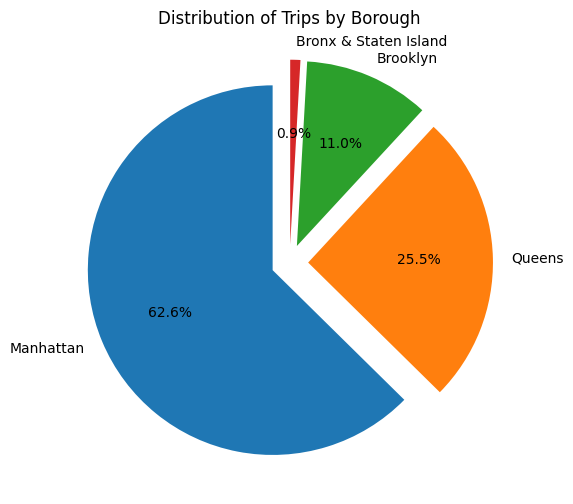

In [1307]:
# Pie Chart Trip based on Borough

labels = BOROUGHedit['BoroughCombine']
sizes = BOROUGHedit['Count of Trip']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=[0.1,0.1,0.1,0.1])
plt.title('Distribution of Trips by Borough')
plt.show()

In [1308]:
# Showing location of JFK Airport

jfk_location_id = zone[zone['Zone'] == 'JFK Airport']['LocationID'].values[0]

jfk_zone = zone[zone['LocationID'] == jfk_location_id]['Zone'].values[0]
jfk_borough = zone[zone['LocationID'] == jfk_location_id]['Borough'].values[0]

print("JFK Airport is located in Zone:", jfk_zone)
print("JFK Airport is located in Borough:", jfk_borough)


JFK Airport is located in Zone: JFK Airport
JFK Airport is located in Borough: Queens


Analysis : 

Manhattan has the biggest proportion of taxi trips distribution with value of 62.6% followed by Queens with value of 25.5 %. Brooklyn, Bronx, and Staten Island has the smallest value of taxi trips distribution.

## Analysis 2 : Distribution of Trips Based on Zone

In [1309]:
# Grouping zone of NYC

zonegroup = tlctrip.groupby(['Zone_PU'])[['VendorID']].count().sort_values(by='VendorID', ascending = False).reset_index()
zonegroup = zonegroup.rename(columns={'VendorID': 'Count of Trip'})
display(zonegroup.head(16))

,Zone_PU,Count of Trip
0,East Harlem North,12140
1,East Harlem South,7933
2,Central Harlem,3359
3,Forest Hills,3342
4,Morningside Heights,3264
5,Central Park,2610
6,Elmhurst,2511
7,Fort Greene,1953
8,Astoria,1412
9,Central Harlem North,1313


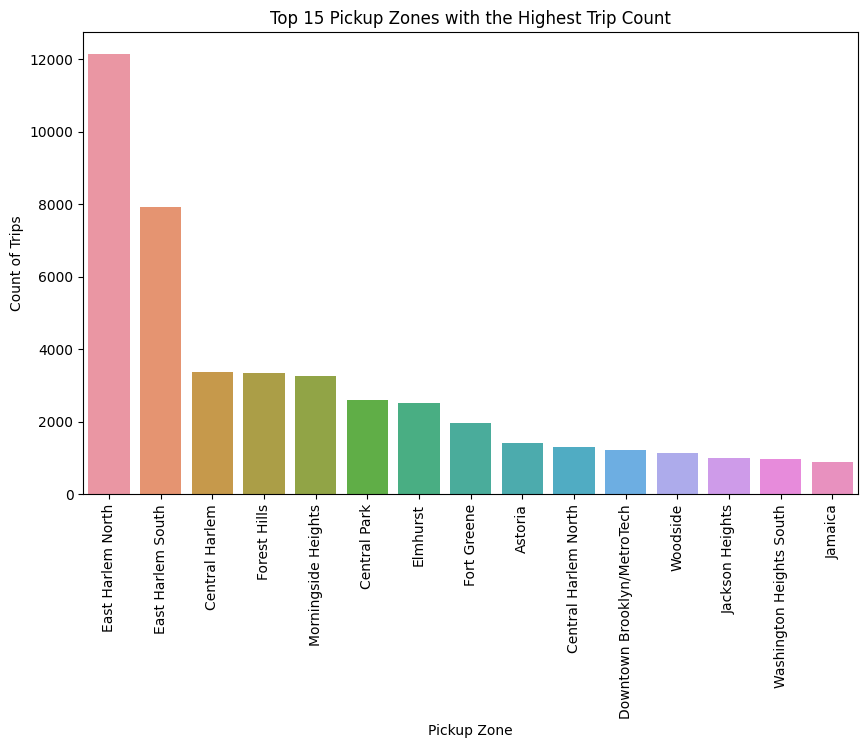

In [1310]:
top_zones = zonegroup.head(15)

# Plot Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Zone_PU', y='Count of Trip', data=top_zones)
plt.xlabel('Pickup Zone')
plt.ylabel('Count of Trips')
plt.title('Top 15 Pickup Zones with the Highest Trip Count')
plt.xticks(rotation=90)
plt.show()


Analysis : 

East Harlem North is the zone that has most number of trips with value of 12140 followed by second best zone which is East Harlem South with 7933 trips. The rest of the zone from top 15 has number of trips in the range of 3000 then slowly reducing to 700 trips.

## Analysis 3 : Number of Trips by Borough and Pickup Zone

In [1311]:
# Grouping Borough and Zone for counting number of trips 

borough_zone_trips = pd.concat([tlctrip[['Borough_PU', 'Zone_PU']], zonegroup[['Count of Trip']]], axis=1)
borough_zone_trips.head(20)

,Borough_PU,Zone_PU,Count of Trip
0,Manhattan,Morningside Heights,12140.0
1,Manhattan,Bloomingdale,7933.0
2,Manhattan,Central Harlem,3359.0
3,Manhattan,Central Harlem,3342.0
4,Manhattan,Central Harlem,3264.0
5,Brooklyn,Park Slope,2610.0
6,Manhattan,Bloomingdale,2511.0
7,Manhattan,Central Harlem,1953.0
8,Manhattan,Bloomingdale,1412.0
9,Brooklyn,Williamsburg (North Side),1313.0


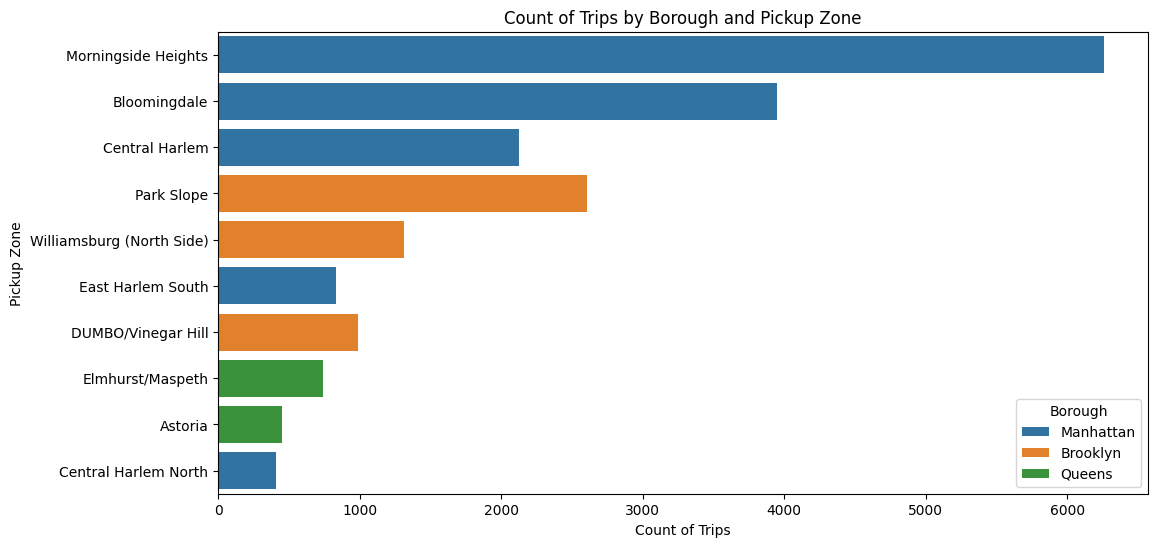

In [1345]:
top_20_records = borough_zone_trips.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count of Trip', y='Zone_PU', hue='Borough_PU', data=top_20_records, ci=None, dodge=False)
plt.xlabel('Count of Trips')
plt.ylabel('Pickup Zone')
plt.title('Count of Trips by Borough and Pickup Zone')
plt.legend(title='Borough')
plt.show()

Analysis : 

Grouping Zone and Borough to make a clearer analysis of the distribution of taxi trips. Manhattan still has the most number of trips at that Borough.

## Analysis 4 : Top 15 Routes of NYC TLC Trips

In [1313]:
# Make route as data frame

routes15 = tlctrip['Route'].value_counts().to_frame()

In [1314]:
# Count of trip that more than 50

routes15 = routes15[routes15['count'] >= 50]

In [1315]:
# Display the data frame

routes15

,count
Route,
East Harlem North - East Harlem South,1943
East Harlem South - East Harlem North,1406
East Harlem North - Upper East Side North,1153
Forest Hills - Forest Hills,1124
East Harlem North - Central Harlem,939
...,...
East Harlem South - Washington Heights South,52
Central Park - Clinton East,50
Fort Greene - Boerum Hill,50


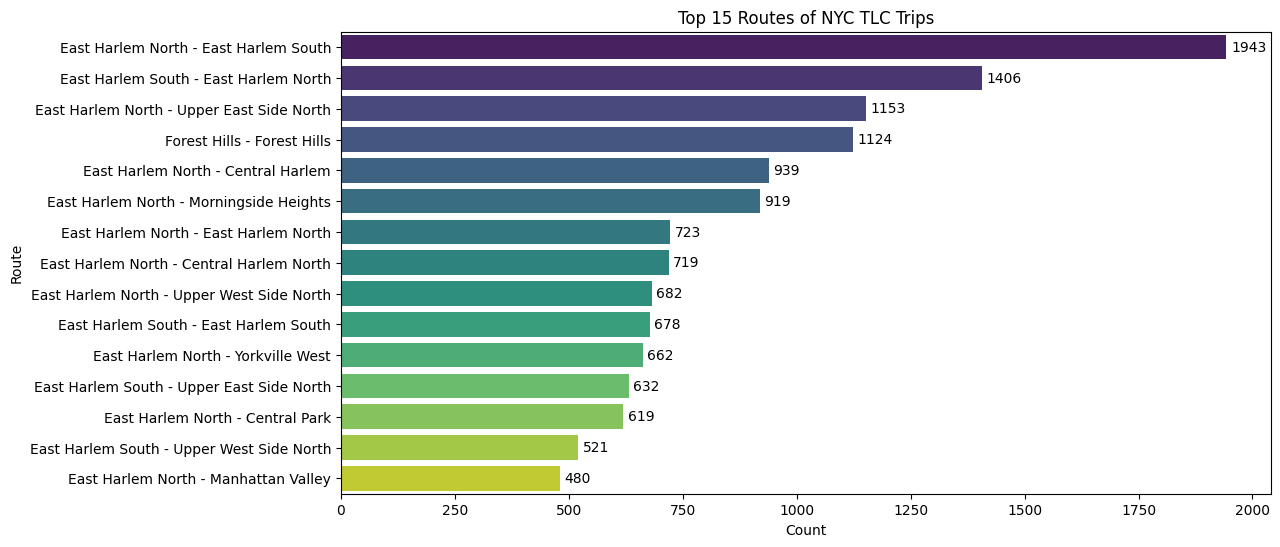

In [1316]:
top_15_routes = tlctrip['Route'].value_counts().head(15)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis')

# Labeling
for i, count in enumerate(top_15_routes.values):
    plt.text(count + 10, i, str(count), va='center')

plt.xlabel('Count')
plt.ylabel('Route')
plt.title('Top 15 Routes of NYC TLC Trips')

plt.show()


Analysis : 

Analysing number of trips from the route taken by the passenger can provide result of most taken route at NYC which is from East Harlem North as pick up location and East Harlem South as drop off location. East Harlem North and East Harlem South are popular pick up location but has different drop off location for each trip.

## Analysis 5 : Frequency of Trip per Day and per Hour

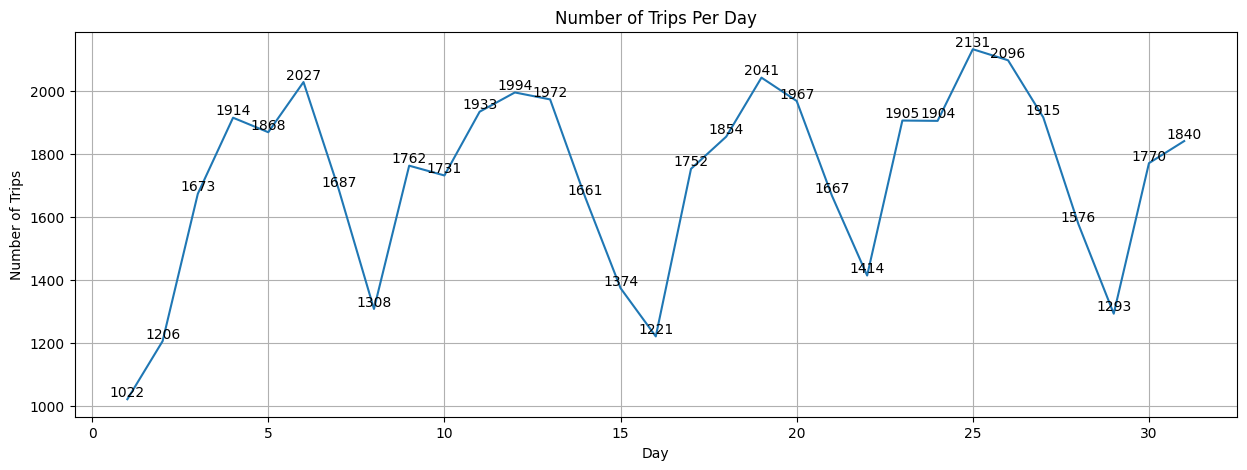

In [1339]:
# Number of trips during the month 

weektrip = tlctrip.groupby('Day')['VendorID'].count().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Number of Trips Per Day')
sns.lineplot(x='Day', y='VendorID', data=weektrip)

plt.xlabel('Day')
plt.ylabel('Number of Trips')

plt.grid(True)

for index, row in weektrip.iterrows():
    plt.annotate(f"{row['VendorID']}", (row['Day'], row['VendorID']), ha='center', va='bottom')

plt.show()

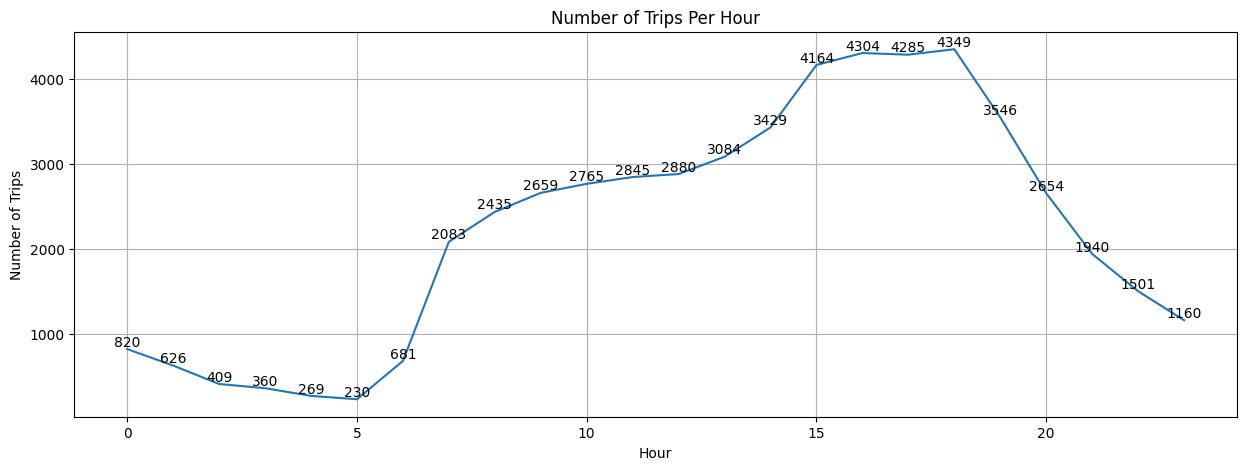

In [1342]:
# Number of trips per day

weektrip = tlctrip.groupby('hourofday')['VendorID'].count().reset_index()

plt.figure(figsize=(15, 5))
plt.title('Number of Trips Per Hour')
sns.lineplot(x='hourofday', y='VendorID', data=weektrip)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')

plt.grid(True)

for index, row in weektrip.iterrows():
    plt.annotate(f"{row['VendorID']}", (row['hourofday'], row['VendorID']), ha='center', va='bottom')

plt.show()

Analysis :

Graph of trips per day in a month shows a fluctuative trend with small amount of taxi trips at the beginning of the month then number increasing and later showing decreasing number of trips. Number of trips per hour graph shows the pattern that more passenger use taxi as mode of transportation in the range of 15.00 until 18.00.

## Analysis 6 : Fare Amount Analysis Based on Route

In [1320]:
# Grouping Route by average fare amount

fareamount = tlctrip.groupby(['Route'])[['fare_amount']].mean().sort_values(by='fare_amount', ascending = False).reset_index()

In [1321]:
# Average fare amount

fareamount

,Route,fare_amount
0,Old Astoria - Clinton East,33.80
1,Upper East Side North - Morrisania/Melrose,33.80
2,East Harlem North - Union Sq,33.80
3,Astoria - West Chelsea/Hudson Yards,33.80
4,Elmhurst - Stuyvesant Heights,33.80
...,...,...
2412,Red Hook - Red Hook,2.50
2413,East Flushing - East Flushing,2.50
2414,Prospect Heights - Prospect Heights,2.50
2415,Highbridge Park - Washington Heights North,2.50


In [1322]:
# Combine route with average fare amount

routesbaru = pd.merge(routes15,fareamount, left_on='Route', right_on='Route', how='left')

In [1323]:
# Sort fare amount value

routesbaru = routesbaru.sort_values(by='fare_amount',ascending=False)
routesbaru

,Route,count,fare_amount
195,East Harlem South - Washington Heights South,52,23.594231
149,Washington Heights South - Upper West Side South,77,23.161039
125,East Harlem North - Washington Heights North,95,22.405263
98,Washington Heights South - Upper West Side North,116,21.890517
97,East Harlem North - Lincoln Square East,116,21.744828
...,...,...,...
25,Morningside Heights - Morningside Heights,356,6.700843
152,Kew Gardens - Briarwood/Jamaica Hills,75,6.569333
21,Central Harlem - Central Harlem,397,6.540554
34,Central Harlem North - Central Harlem North,294,6.535714


In [1324]:
# Combine the data frame with original data frame

routesbaru = pd.merge(routesbaru,tlctrip, left_on='Route', right_on='Route', how='left')

In [1325]:
# Make new data frame only for selected column

routesbaru = routesbaru[['Route','count','fare_amount_y','trip_distance']]

In [1326]:
# Calculate ratio of fare amount with trip distance

routesbaru['Ratio'] = routesbaru['fare_amount_y']/routesbaru['trip_distance']

In [1327]:
# Remove outlier of ratio

IQR = routesbaru['Ratio'].quantile(0.75) - routesbaru['Ratio'].quantile(0.25)
IQR

lower_bound = routesbaru['Ratio'].quantile(0.25) - IQR*1.5
upper_bound = routesbaru['Ratio'].quantile(0.75) + IQR*1.5

routesbaru = routesbaru.loc[(routesbaru['Ratio'] > lower_bound) & (routesbaru['Ratio'] < upper_bound)]

In [1328]:
# Drop duplicate of same route

routesbaru.drop_duplicates(subset=['Route']).sort_values(by='Ratio',ascending=False).reset_index()

,index,Route,count,fare_amount_y,trip_distance,Ratio
0,36808,Central Park - East Harlem South,68,6.5,0.57,11.403509
1,38181,East Harlem South - East Harlem South,678,5.1,0.45,11.333333
2,22569,Washington Heights South - Washington Heights ...,81,9.3,0.83,11.204819
3,39836,Central Harlem North - Central Harlem North,294,5.8,0.53,10.943396
4,28702,Woodside - Woodside,91,5.8,0.55,10.545455
...,...,...,...,...,...,...
195,6480,Jackson Heights - LaGuardia Airport,59,17.7,4.14,4.275362
196,11370,East Harlem North - Upper East Side North,1153,7.5,1.81,4.143646
197,17983,Central Park - Upper West Side South,172,13.0,3.16,4.113924
198,13314,Morningside Heights - Upper West Side South,229,9.0,2.22,4.054054


Ratio Between Fare Amount and Trip Distance

In [1329]:
# Top 5

display(routesbaru.drop_duplicates(subset=['Route']).sort_values(by='Ratio',ascending=False).reset_index().head())

,index,Route,count,fare_amount_y,trip_distance,Ratio
0,36808,Central Park - East Harlem South,68,6.5,0.57,11.403509
1,38181,East Harlem South - East Harlem South,678,5.1,0.45,11.333333
2,22569,Washington Heights South - Washington Heights ...,81,9.3,0.83,11.204819
3,39836,Central Harlem North - Central Harlem North,294,5.8,0.53,10.943396
4,28702,Woodside - Woodside,91,5.8,0.55,10.545455


In [1330]:
# Bottom 5

display(routesbaru.drop_duplicates(subset=['Route']).sort_values(by='Ratio',ascending=False).reset_index().tail())

,index,Route,count,fare_amount_y,trip_distance,Ratio
195,6480,Jackson Heights - LaGuardia Airport,59,17.7,4.14,4.275362
196,11370,East Harlem North - Upper East Side North,1153,7.5,1.81,4.143646
197,17983,Central Park - Upper West Side South,172,13.0,3.16,4.113924
198,13314,Morningside Heights - Upper West Side South,229,9.0,2.22,4.054054
199,2337,East Harlem South - Hamilton Heights,78,14.5,4.40,3.295455


Analysis : 

Checking whether the fare amount is equally proportional to trip distance. Ratio value came from value of average fare amount divided by trip distance per number of trip counted from the data. The analysis shows that the there are taxi trips with short distance of trip that has expensive fare amount and likewise with the trip with long distance that has cheap fare amount

## Import to CSV

In [1333]:
routesbaru.to_csv('NYC routesbaru.csv',index=False)

In [1334]:
tlctrip.to_csv('NYC for Tableau.csv',index=False)

# Kesimpulan

1. From the distribution of trips based on borough and zone, it can be observed that the number of taxi trips in New York City is not evenly distributed. There is a significant difference in the number of trips between the highest and lowest zones and boroughs.

2. It can be inferred that East Harlem (North and South) are popular pick-up locations, as most taxi drivers tend to accumulate in those zones. However, there are still other routes with different pick-up locations that have a relatively small number of trips.

3. Taxis are used as a transportation mode throughout the day. The number of trips shows a significant increase from early morning until after work hours, and then gradually decreases until midnight.

4. The analysis reveals that there are instances where the fare amount of taxi trips does not correspond proportionally to the trip distance. Both values should ideally be proportional to each other.

# Rekomendasi

1. Improve taxi distribution: To address the uneven distribution of taxi trips, it is recommended to allocate resources and incentives to encourage taxi drivers to operate in areas with low taxi availability. This can be achieved through targeted initiatives, such as providing financial incentives or offering additional benefits for serving under-served areas.

2. Enhance availability in other routes: While East Harlem (North and South) are popular pick-up locations, efforts should be made to improve taxi availability in other routes with low trip numbers. This can be accomplished by promoting those routes among taxi drivers, providing real-time data on demand and passenger trends, and incentivizing drivers to serve those areas.

3. Adjust taxi supply throughout the day: Since taxis are used as a transportation mode throughout the day, it is important to adjust the taxi supply based on the varying demand patterns. This can involve monitoring and analyzing the demand trends in different time periods and deploying taxis accordingly to ensure an adequate supply during peak hours and optimize resources during off-peak periods.

4. Ensure fare-distance proportionality: To address the issue of fare amount not being proportional to the trip distance, it is recommended to review and revise the fare structure to ensure a fair and accurate representation of the distance traveled. This can involve conducting periodic evaluations of fare calculations and considering adjustments based on factors such as fuel costs, operational expenses, and market dynamics.

By implementing these recommendations, it is possible to improve taxi availability, enhance customer satisfaction, and optimize the overall efficiency of the taxi transportation system in New York City.